# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import warnings
warnings.filterwarnings("ignore")

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [5]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

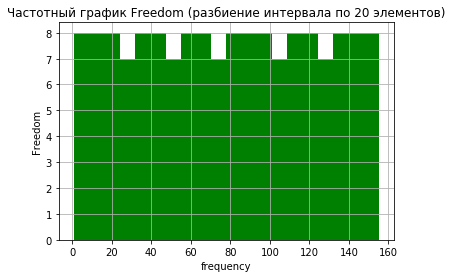

In [6]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

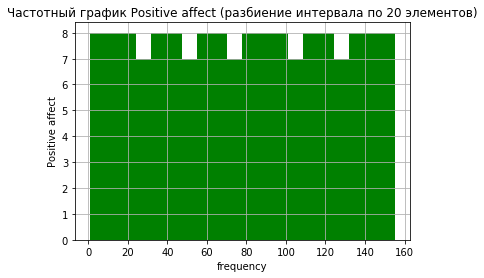

In [7]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

In [8]:
# Данные распределения являются равномерными распределениями, так как нет выраженного пика. 

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
# Посмотрим есть ли отсутствующие значения в столбце Freedom
df.Freedom.isnull().sum()

1

In [10]:
# Эта строка и будет нашим выбросом, удалим ее, чтобы корректно рассчитать остальные параметры
df[df.Freedom.isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [11]:
df = df.drop(index=[28])

In [12]:
df.Freedom.isnull().sum()

0

In [13]:
# Медиана:
statistics.median(df.Freedom)

78.0

In [14]:
# Мода:
statistics.mode(df.Freedom)

StatisticsError: no unique mode; found 155 equally common values

In [15]:
# Мат. ожидание
statistics.mean(df.Freedom)

78.0

In [16]:
# Стандартное отклонение
statistics.pstdev(df.Freedom)

44.74371464239419

In [17]:
# Дисперсия
statistics.pstdev(df.Freedom)**2

2002.0

In [18]:
# Дисперсия
statistics.pvariance(df.Freedom)

2002.0

In [19]:
# Минимум
min(df.Freedom)

1.0

In [20]:
# Максимум
max(df.Freedom)

155.0

In [21]:
# Размах
Freedom_range = max(df.Freedom) - min(df.Freedom)
Freedom_range

154.0

Почему нельзя найти моду?

In [22]:
statistics.mode(df.Freedom)

StatisticsError: no unique mode; found 155 equally common values

In [23]:
df.Freedom.nunique()

155

In [24]:
# Мода-это наиболее часто встречаемое значение в наборе данных, 
# в нашем случае у нас нет такого значения, у нас 155 из 155 значений - уникальны

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Text(0, 0.5, 'Positive affect')

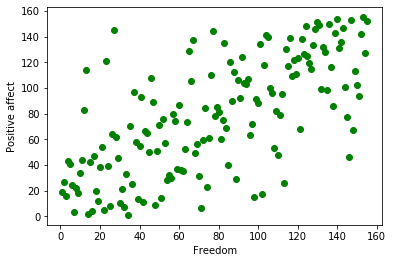

In [25]:
x = df['Freedom']
y = df['Positive affect']
plt.scatter(x, y, c='green')

plt.xlabel('Freedom')
plt.ylabel('Positive affect')

In [26]:
# Судя по графику есть положительная корреляция между Freedom и Positive affect.
# Посмотрим теперь, что покажет коэффициент Пирсона

In [27]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
print(corr)

0.6817698430601657


In [28]:
# Коэффициент Пирсона также показывает, что между переменными есть выраженная прямая взаимосвязь.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [29]:
Freedom = df.Freedom - statistics.mean(df.Freedom)
print(statistics.mean(Freedom))

0.0


In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom = min_max_scaler.fit_transform(np.array(df.Freedom).reshape(-1, 1))
print(min(Freedom))
print(max(Freedom))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

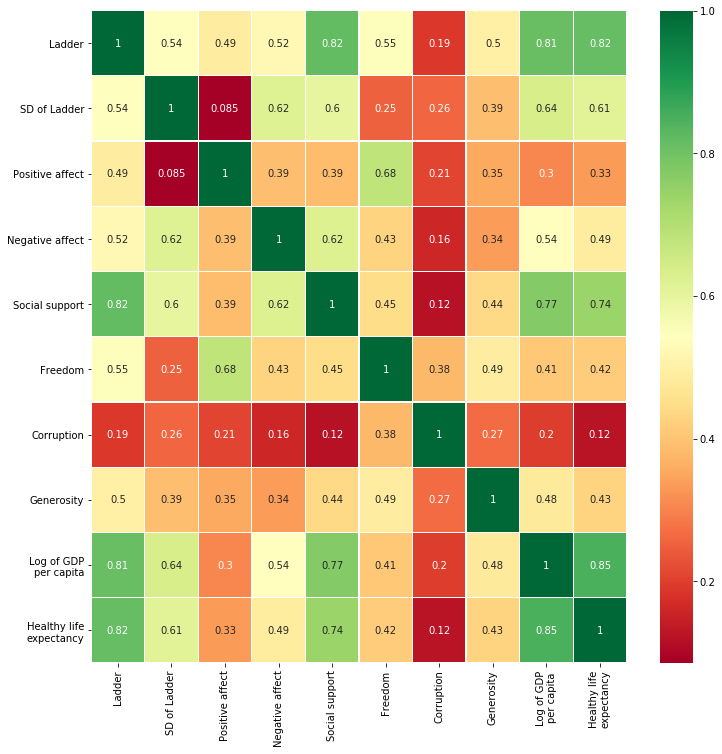

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [32]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

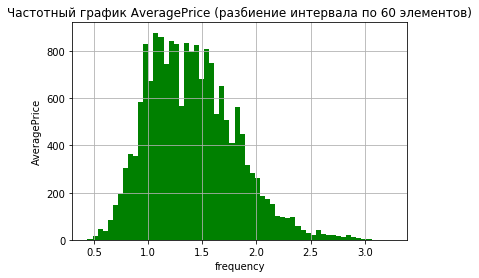

In [33]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 60, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 60 элементов)')
plt.grid(True)
plt.show()

In [34]:
# Распределение стремится к нормальному, похоже также на распределение Пуассона. 

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Text(0, 0.5, 'AveragePrice')

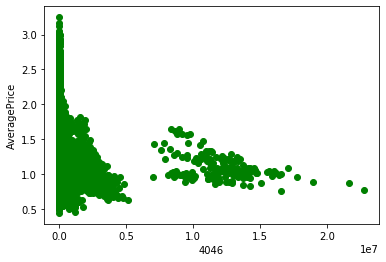

In [35]:
x = df['4046']
y = df['AveragePrice']
plt.scatter(x, y, c='green')

plt.xlabel('4046')
plt.ylabel('AveragePrice')

In [36]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.2083170484878848


In [37]:
coef, p = sts.spearmanr(df['4046'], df['AveragePrice'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['4046'], df['AveragePrice'])
print('Kendall correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.596
Kendall correlation coefficient: -0.417


In [38]:
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print(corr)

-0.1729277725093354


In [39]:
coef, p = sts.spearmanr(df['4225'], df['AveragePrice'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['4225'], df['AveragePrice'])
print('Kendall correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.514
Kendall correlation coefficient: -0.344


In [40]:
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print(corr)

-0.17944598397975622


In [41]:
coef, p = sts.spearmanr(df['4770'], df['AveragePrice'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['4770'], df['AveragePrice'])
print('Kendall correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.533
Kendall correlation coefficient: -0.375


In [42]:
# Есть небольшая обратная корреляция между 4046, 4225, 4770 и Average Price. 
# Особенно это заметно, если брать коэффициент Спирмена
# Наверное, можно разбить наши данные на 2 группы и проанализировать их по отдельности. 

In [43]:
df2 = df[df['4046']<(0.5*10**7)]

Text(0, 0.5, 'AveragePrice')

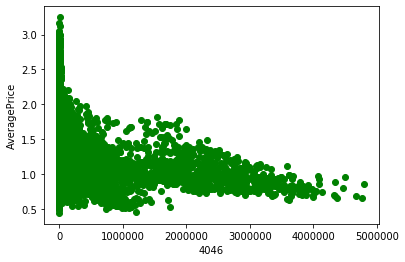

In [44]:
x = df2['4046']
y = df2['AveragePrice']
plt.scatter(x, y, c='green')

plt.xlabel('4046')
plt.ylabel('AveragePrice')

In [45]:
corr, p_value = pearsonr(df2['4046'], df2['AveragePrice'])
print(corr)

-0.3417361199420759
